# Pneumonia Deep Learning Project

### Introduction

This notebook displays two different Convolutional Neural Networks(CNN), one being advanced and the other scaled down version of the first. The dataset used for this project includes images of normal patients' chest x-rays and x-rays of patients with pneumonia. 

### Setup Environment

In this section all the variable that are used by the CNNs are established.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import numpy as np
import matplotlib.pyplot as plt


#Dataset path
test_path = "/Users/tarunmurugan/Documents/CodeStuff/Python/Projects/pneumonia/chest_xray/test"
train_path = "/Users/tarunmurugan/Documents/CodeStuff/Python/Projects/pneumonia/chest_xray/train"
val_path = "/Users/tarunmurugan/Documents/CodeStuff/Python/Projects/pneumonia/chest_xray/val"

batch_size = 50
image_height = 150
image_width = 150

In [2]:
#Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [3]:
#Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 624 files belonging to 2 classes.
Using 124 files for validation.


In [4]:
#Test dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    image_size=(image_height,image_width),
    batch_size=batch_size
)

Found 16 files belonging to 2 classes.


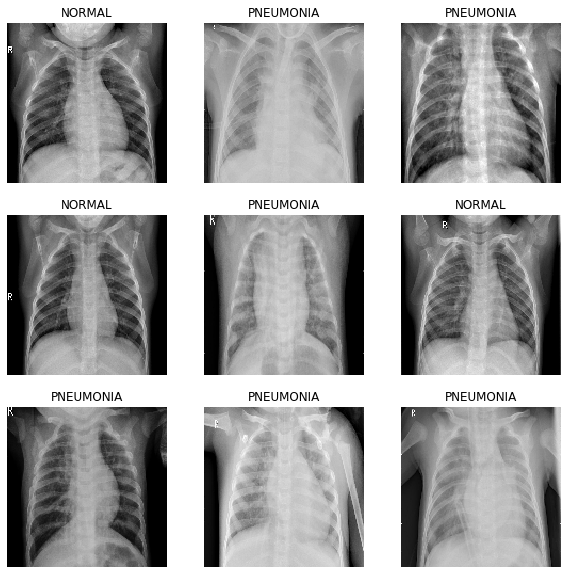

In [5]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [6]:
#Increasing training efficiency
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1

This section shows the summary and the Model 1's performance during and after training.

In [7]:
model_1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(96, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Conv2D(48, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Conv2D(24, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Flatten(),
  layers.Dense(3)
])

In [8]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 96)      1248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 48)        18480     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 24)        4632      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 24)        0

In [10]:
epochs=10
trained_model_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
84/84 [==============================] - 212s 3s/step - loss: 0.3919 - accuracy: 0.8282 - val_loss: 0.7467 - val_accuracy: 0.7581
Epoch 2/10
84/84 [==============================] - 207s 2s/step - loss: 0.1656 - accuracy: 0.9363 - val_loss: 1.0899 - val_accuracy: 0.7258
Epoch 3/10
84/84 [==============================] - 208s 2s/step - loss: 0.1022 - accuracy: 0.9643 - val_loss: 0.9294 - val_accuracy: 0.7419
Epoch 4/10
84/84 [==============================] - 206s 2s/step - loss: 0.0831 - accuracy: 0.9712 - val_loss: 0.9689 - val_accuracy: 0.7742
Epoch 5/10
84/84 [==============================] - 207s 2s/step - loss: 0.0748 - accuracy: 0.9751 - val_loss: 1.2187 - val_accuracy: 0.7339
Epoch 6/10
84/84 [==============================] - 206s 2s/step - loss: 0.0730 - accuracy: 0.9724 - val_loss: 0.8023 - val_accuracy: 0.7581
Epoch 7/10
84/84 [==============================] - 208s 2s/step - loss: 0.0715 - accuracy: 0.9734 - val_loss: 1.4713 - val_accuracy: 0.7258
Epoch 8/10
84

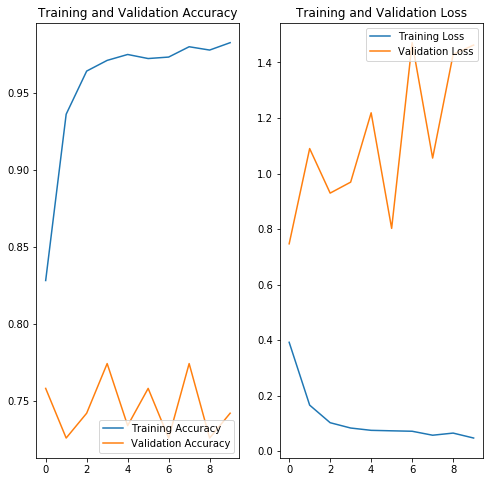

In [11]:
acc = trained_model_1.history['accuracy']
val_acc = trained_model_1.history['val_accuracy']

loss=trained_model_1.history['loss']
val_loss=trained_model_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
model_1_results = model_1.evaluate(test_ds)
print("loss: " + str(model_1_results[0]))
print("accuracy: " + str(model_1_results[1] * 100) + "%")

1/1 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
loss: 0.07958534359931946
accuracy: 100.0%


### Model 2

This section shows the summary and the Model 2's performance during and after training. This model is a simplified version of the previous model.

In [13]:
model_2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(24, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Conv2D(12, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Conv2D(6, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Conv2D(3, (2,2), padding="same", activation="relu"),
  layers.MaxPool2D((2,2), padding="same"),
  layers.Flatten(),
  layers.Dense(3)
])

In [14]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 24)      312       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 24)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 12)        1164      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 12)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 6)         294       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 6)        

In [16]:
epochs = 10
trained_model_2 = model_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
84/84 [==============================] - 51s 608ms/step - loss: 0.6979 - accuracy: 0.7211 - val_loss: 0.6418 - val_accuracy: 0.6532
Epoch 2/10
84/84 [==============================] - 52s 625ms/step - loss: 0.4383 - accuracy: 0.7946 - val_loss: 0.5992 - val_accuracy: 0.7097
Epoch 3/10
84/84 [==============================] - 55s 651ms/step - loss: 0.3529 - accuracy: 0.8502 - val_loss: 0.5974 - val_accuracy: 0.7258
Epoch 4/10
84/84 [==============================] - 53s 632ms/step - loss: 0.3085 - accuracy: 0.8728 - val_loss: 0.6679 - val_accuracy: 0.7097
Epoch 5/10
84/84 [==============================] - 53s 626ms/step - loss: 0.2392 - accuracy: 0.9027 - val_loss: 0.6763 - val_accuracy: 0.7742
Epoch 6/10
84/84 [==============================] - 53s 634ms/step - loss: 0.1813 - accuracy: 0.9305 - val_loss: 0.5612 - val_accuracy: 0.8065
Epoch 7/10
84/84 [==============================] - 54s 644ms/step - loss: 0.1517 - accuracy: 0.9422 - val_loss: 1.0906 - val_accuracy: 0.7177

In [26]:
model_2_results = model_1.evaluate(test_ds)
print("loss: " + str(model_2_results[0]))
print("accuracy: " + str(model_2_results[1] * 100) + "%")

1/1 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
loss: 0.07958534359931946
accuracy: 100.0%


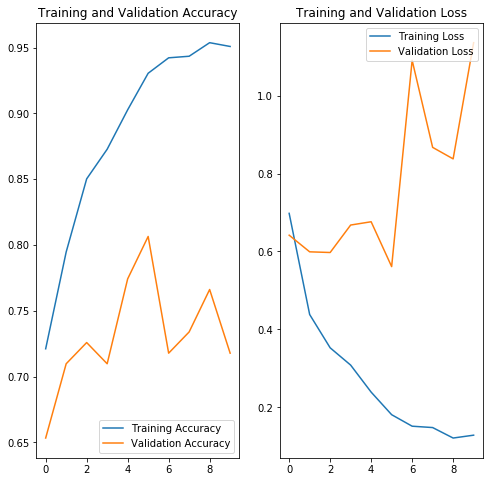

In [17]:
acc = trained_model_2.history['accuracy']
val_acc = trained_model_2.history['val_accuracy']

loss=trained_model_2.history['loss']
val_loss=trained_model_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
